# Aktien Vorhersage durch lineare Regression & SVM

### Importieren von Abhängigkeiten

In [32]:
import numpy as np                                     #Arrays

from sklearn.linear_model import LinearRegression      #Lineare Regression 
from sklearn.svm import SVR                            #Lineare Support Vector Machine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt                        #Darstellung von Daten
from matplotlib import style

from pandas_datareader import data                     #Datenleser zum lesen aus Yahoo Finance

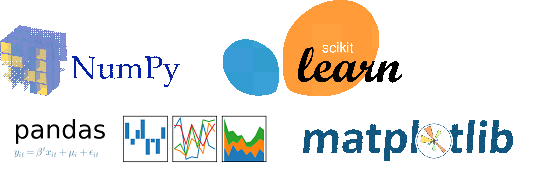

In [33]:
style.use('seaborn-pastel')

### Daten von Yahoo Finance abfragen und in Datenframe speichern

In [34]:
df_google_h = data.DataReader("GOOGL", 
                       start='2015-1-1',    # kann angepasst werden
                       end='2019-11-05',    # dito
                       data_source='yahoo') # GOOGL kann z.B. mit AAPL ersetz werden

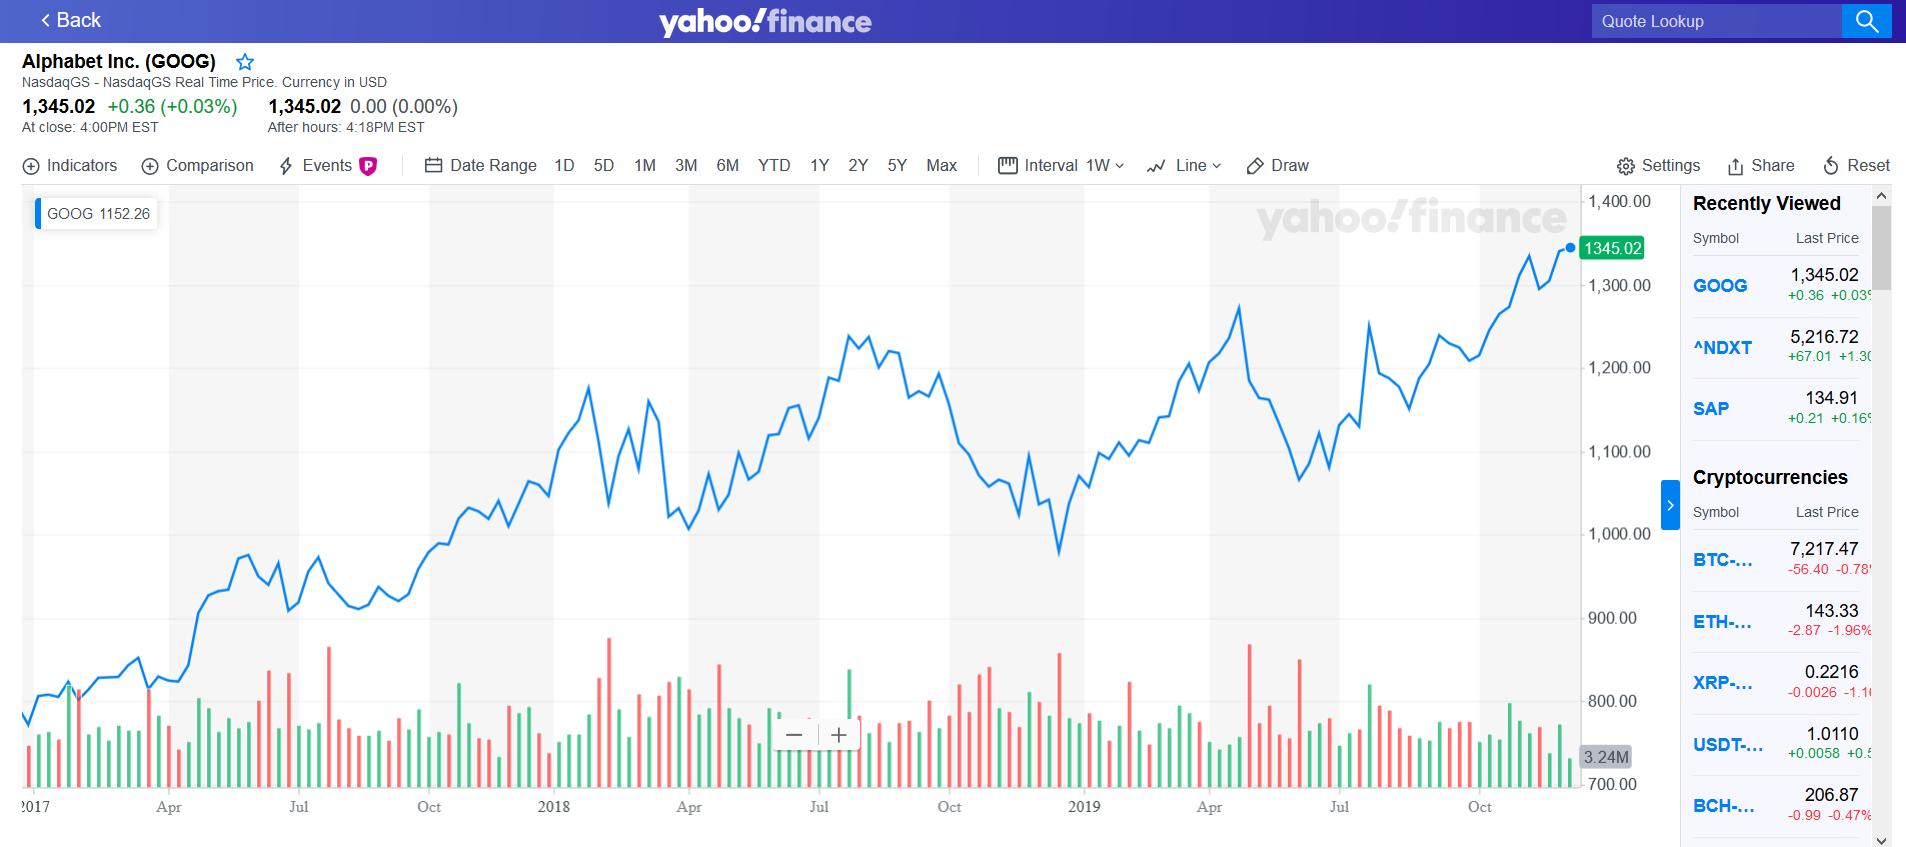

*Dataframe anzeigen: obere 3 Elemente*

In [35]:
df_google_h.head(3)

High         Low        Open       Close   Volume  \
Date                                                                  
2015-01-02  535.799988  527.880005  532.599976  529.549988  1324000   
2015-01-05  527.989990  517.750000  527.150024  519.460022  2059100   
2015-01-06  521.210022  505.549988  520.500000  506.640015  2722800   

             Adj Close  
Date                    
2015-01-02  529.549988  
2015-01-05  519.460022  
2015-01-06  506.640015

*Dataframe anzeigen: untere 3 Elemente*

In [36]:
df_google_h.tail(3)

High          Low         Open        Close   Volume  \
Date                                                                     
2019-11-01  1273.00000  1259.709961  1265.800049  1272.250000  1440600   
2019-11-04  1292.50000  1276.109985  1276.109985  1289.609985  1531600   
2019-11-05  1297.23999  1289.380005  1291.199951  1291.439941  1257100   

              Adj Close  
Date                     
2019-11-01  1272.250000  
2019-11-04  1289.609985  
2019-11-05  1291.439941

*Nur die Spalte Adj Close ist wichtig*

In [37]:
df_google_h = df_google_h[['Adj Close']]

*Dataframe noch einmal anzeigen*

In [38]:
df_google_h.head()

Adj Close
Date                  
2015-01-02  529.549988
2015-01-05  519.460022
2015-01-06  506.640015
2015-01-07  505.149994
2015-01-08  506.910004

### Datenmodell ergänzen

*Anzahl der vorherzusagenden Tagen festlegen* 

In [39]:
vorhersage_tage = 30 # sei n

*Neue Spalte für die Vorhersage (abhängige Variable) erstellen und mit n Einheiten verschieben*

In [40]:
df_google_h['Prediction'] = df_google_h[['Adj Close']].shift(-vorhersage_tage)

In [41]:
df_google_h.tail()

Adj Close  Prediction
Date                               
2019-10-30  1260.699951         NaN
2019-10-31  1258.800049         NaN
2019-11-01  1272.250000         NaN
2019-11-04  1289.609985         NaN
2019-11-05  1291.439941         NaN

*Dataframe in array umwandeln und die letzten n Zeilen entfernen*

In [42]:
X = np.array(df_google_h.drop(['Prediction'],1))

X = X[:-vorhersage_tage]
print(X)

[[ 529.54998779]
 [ 519.46002197]
 [ 506.64001465]
 ...
 [1229.83996582]
 [1234.68994141]
 [1218.32995605]]


*Y data set erstellen und in array speichern* |
*Alle Zeilen bis auf die letzten n*

In [43]:
y = np.array(df_google_h['Prediction'])
y = y[:-vorhersage_tage]
print(y)

[ 545.01000977  542.65002441  546.45001221 ... 1272.25       1289.60998535
 1291.43994141]


*80% der Daten zum Trainieren, 20% zum Testen*

In [44]:
x_trainieren, x_testen, y_trainieren, y_testen = train_test_split(X, y, test_size=0.2)

#### Erstellen und trainieren von der Support Vector Machine mit Regression

In [45]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_trainieren, y_trainieren)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

*Testen des Modells: Score() gibt R² zurück* | *R² ∈ [0, 1]*

In [46]:
svm_determinant = svr_rbf.score(x_testen, y_testen) # Determinant =  Determinationskoeffizient
print("SVM Determinationskoeffizient: ", svm_determinant)

SVM Determinationskoeffizient:  0.900959423399947


#### Erstellen und trainieren vom Modell durch lineare Regression

In [47]:
lr = LinearRegression()
lr.fit(x_trainieren, y_trainieren)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Testen des Modells: Score() gibt R² zurück* | *R² ∈ [0, 1]*

In [48]:
lr_determinant = lr.score(x_testen, y_testen)
print("LR Determinationskoeffizient: ", lr_determinant)

LR Determinationskoeffizient:  0.911236762278636


#### X_Vorhersage beinhaltet die letzten n Zeilen von Adj Close (unabhängige Variable)

In [49]:
x_vorhersage = np.array(df_google_h.drop(['Prediction'],1))[-vorhersage_tage:]
x_vorhersage

array([[1245.93994141],
       [1242.29003906],
       [1225.94995117],
       [1221.14001465],
       [1206.        ],
       [1177.92004395],
       [1189.43005371],
       [1210.95996094],
       [1208.25      ],
       [1190.13000488],
       [1202.40002441],
       [1209.4699707 ],
       [1215.70996094],
       [1217.77001953],
       [1242.23999023],
       [1243.        ],
       [1252.80004883],
       [1244.41003418],
       [1244.2800293 ],
       [1241.19995117],
       [1257.63000488],
       [1259.10998535],
       [1264.30004883],
       [1288.97998047],
       [1260.66003418],
       [1260.69995117],
       [1258.80004883],
       [1272.25      ],
       [1289.60998535],
       [1291.43994141]])

*Vorhersagen anzeigen: LR*

In [50]:
lr_voraussage = lr.predict(x_vorhersage)
lr_voraussage

array([1245.9955199 , 1242.53213907, 1227.02708115, 1222.46294753,
       1208.09663533, 1181.4516535 , 1192.37346551, 1212.80312664,
       1210.23165325, 1193.03764697, 1204.68062984, 1211.3892796 ,
       1217.31038668, 1219.26516979, 1242.48464789, 1243.20581876,
       1252.50505422, 1244.54379575, 1244.42043453, 1241.4977581 ,
       1257.0881843 , 1258.49253311, 1263.41736799, 1286.83607736,
       1259.96336956, 1260.00124666, 1258.19843532, 1270.96105161,
       1287.43388701, 1289.17032655])

*Vorhersagen anzeigen: SVM*

In [51]:
svm_voraussage = svr_rbf.predict(x_vorhersage)
svm_voraussage

array([1091.51880816, 1106.13934828, 1172.16010209, 1196.20511074,
       1166.10730869, 1091.63112709, 1167.50745387, 1172.49768993,
       1078.90496217, 1175.07550722, 1166.81836873, 1131.88856293,
       1208.97971823, 1220.98952747, 1107.58270177, 1100.61144677,
       1172.28598918, 1113.50235352, 1113.75683   , 1171.97850892,
       1195.14843617, 1165.8798798 , 1165.60531124,  991.13482007,
       1160.24820041, 1161.70345666, 1176.61505301, 1044.46906484,
        961.08732968,  919.87028315])

### Graphische Darstellung

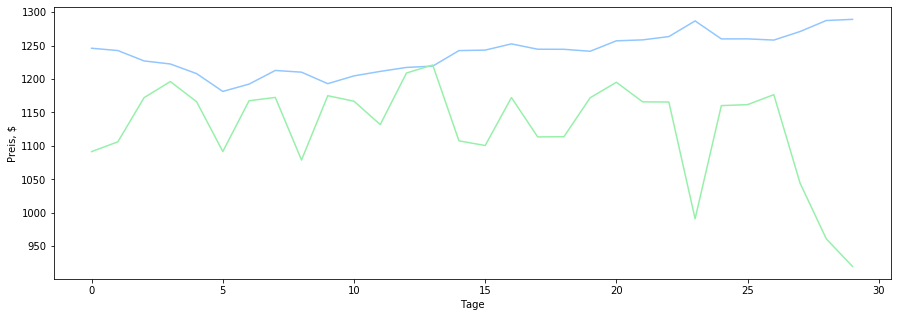

In [52]:
plt.figure(figsize=(15,5))
plt.xlabel('Tage')
plt.ylabel('Preis, $')   
plt.plot(lr_voraussage)  # Blau
plt.plot(svm_voraussage) # Grün

> ###### Wenn Sie bessere Ergebnisse als die breite Masse haben wollen, müssen Sie auch anders vorgehen als die breite Masse
>
>  <cite>*Sir John Templeton*</cite>

In [ ]:

/$$$$$$$$ /$$                       /$$$$$$$$                 /$$      
|__  $$__/ $$                      | $$_____/                | $$      
   | $$  | $$$$$$$   /$$$$$$       | $$       /$$$$$$$   /$$$$$$$      
   | $$  | $$__  $$ /$$__  $$      | $$$$$   | $$__  $$ /$$__  $$      
   | $$  | $$  \ $$| $$$$$$$$      | $$__/   | $$  \ $$| $$  | $$      
   | $$  | $$  | $$| $$_____/      | $$      | $$  | $$| $$  | $$      
   | $$  | $$  | $$|  $$$$$$$      | $$$$$$$$| $$  | $$|  $$$$$$$      
   |__/  |__/  |__/ \_______/      |________/|__/  |__/ \_______/
